# Demonstration of using a custom color list with `donut_plot_with_subgroups_from_dataframe.py`

Demonstrating use of `donut_plot_with_subgroups_from_dataframe.py` with a custom color list when using the imported script in a Jupyter notebook.

The same approach can be used with the two related scripts `donut_plot_with_total_summary_and_subgroups_from_dataframe.py` and `donut_plot_with_total_binary_summary_and_binary_state_subgroups.py` and this is covered at the bottom of this notebook.

This builds on the demonstration [here](index.ipynb) and so you may want to look at that first if you are not familiar with the script `donut_plot_with_subgroups_from_dataframe.py` first. And also see [here](https://github.com/fomightez/donut_plots_with_subgroups) for more information.

In addition to this demonstration page, there are several other demonstration pages:

- [Demonstrate the full-featured script to make a single donut plot with subgroups](index.ipynb)
- [Demonstrate the basics](demo_basics_from_df.ipynb)
- [Demonstrate a full-featured script that plots a summary for the subgroups in addition to the donut plot with subgroups](demo_summary_subgroups.ipynb)
- [Demonstrate a full-featured script that plots a summary for binary data in addition to the donut plot with the binary group broken down by a group](demo_summary_binary.ipynb)


-----



## Preparation

Let's get the script to insure it is here. (It won't do antyhing if the script is already retrieved.)

In [1]:
import os
file_needed = "donut_plot_with_subgroups_from_dataframe.py"
if not os.path.isfile(file_needed):
    !curl -OL https://raw.githubusercontent.com/fomightez/donut_plots_with_subgroups/master/donut_plot_with_subgroups_from_dataframe.py

Define a demo dataframe will be used for input data.

In [2]:
import pandas as pd
obs = [('A', 1, "frizzled"), 
       ('A', 1, "lethargic"), 
       ('A', 1, "polythene"), 
       ('A', 1, "epic"),
       ('A', 2, "frizzled"), 
       ('A', 2, "lethargic"), 
       ('A', 2, "epic"),
       ('A', 3, "frizzled"), 
       ('A', 3, "lethargic"),
       ('A', 3, "polythene"),
       ('A', 3, "epic"),
       ('A', 3, "bedraggled"),
       ('B', 1, "frizzled"), 
       ('B', 1, "lethargic"),
       ('B', 1, "polythene"),
       ('B', 1, "epic"),
       ('B', 1, "bedraggled"),
       ('B', 1, "moombahcored"),
       ('B', 2, "frizzled"), 
       ('B', 2, "lethargic"),
       ('B', 2, "polythene"),
       ('B', 2, "epic"),
       ('B', 2, "bedraggled"),
       ('C', 1, "frizzled"), 
       ('C', 1, "lethargic"),
       ('C', 1, "polythene"),
       ('C', 1, "epic"),
       ('C', 1, "bedraggled"),
       ('C', 1, "moombahcored"),
       ('C', 1, "zoned"),
       ('C', 1, "erstaz"),
       ('C', 1, "mined"),
       ('C', 1, "liberated"),
       ('C', 2, "frizzled"), 
       ('C', 2, "lethargic"),
       ('C', 2, "polythene"),
       ('C', 2, "epic"),
       ('C', 2, "bedraggled"),
       ('C', 3, "frizzled"), 
       ('C', 3, "lethargic"),
       ('C', 3, "polythene"),
       ('C', 3, "epic"),
       ('C', 3, "bedraggled"),
       ('C', 4, "bedraggled"),
       ('C', 4, "frizzled"), 
       ('C', 4, "lethargic"),
       ('C', 4, "polythene"),
       ('C', 4, "epic"),
       ('C', 5, "frizzled"), 
       ('C', 5, "lethargic"),
       ('C', 5, "polythene"),
       ('C', 5, "epic"),
       ('C', 5, "bedraggled"),
       ('C', 5, "moombahcored")]
labels = ['group', 'subgroup', 'sub-subgroup']
df = pd.DataFrame.from_records(obs, columns=labels)
df.head()

,group,subgroup,sub-subgroup
0,A,1,frizzled
1,A,1,lethargic
2,A,1,polythene
3,A,1,epic
4,A,2,frizzled


Now that we have script and the dataframe, we are ready to demonstrate using our own colors


----

## Using a custom color list

In the [previous notebook](index.ipynb), I used the following to import the main function of the `donut_plot_with_subgroups_from_dataframe.py` script.

```python
from donut_plot_with_subgroups_from_dataframe import donut_plot_with_subgroups_from_dataframe
```

While that was useful for making the call of the script shorter, I couldn't come up with a way to replace the colormap generator/function when I did it that way. (See [here](https://stackoverflow.com/a/710603/8508004) for more about the pros and cons.)   
And so you'll note that here I **import the script slightly differently and then call it differently**. This is **important** to making this process to provide your own custom color list work as described here. (*Note: there is most likely a way to do it the other way; however, my attempts to work out what that was all failed and the one I am suggesting here works.)

The next cell demonstrates how you'll need to import for this to work:

In [3]:
import donut_plot_with_subgroups_from_dataframe

Let's use the main function with the standard colormapping for now so we can be sure we are overriding it later.  
The next cell calls the script.

Note: No list to specify high to low intensity coloring provided, and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order of intensity.

Plot figure object returned.

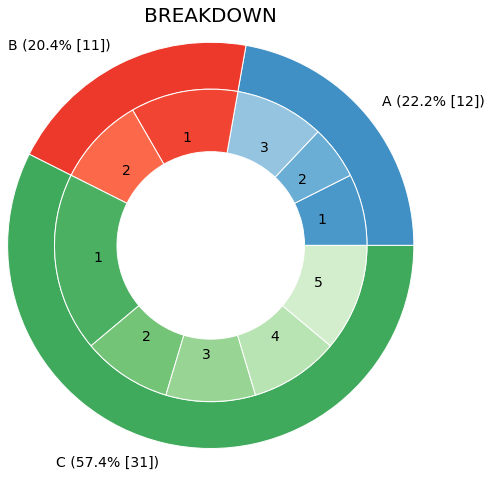

In [4]:
donut_plot_with_subgroups_from_dataframe.donut_plot_with_subgroups_from_dataframe(df=df,groups_col="group",subgroups_col="subgroup", sort_on_subgroup_name=True);

Okay, the script runs; however, those are not the colors we want. Let's work on getting customized colors as part of the plot.

The generator function `sequential_color_maps_generator` is the one in the current script that generates the sequential colormaps used. We'd like to effectively replace that with the following where an example color list `color_list_to_use` is used:

```python
#ALTERNATE WHEN WANT SET COLORS YOURSELF (SUCH AS TO MATCH A PALETTE FOR POSTER):
# This will cycle over a list of colors
def sequential_color_maps_generator():
    '''
    This will cycle over a built-in list of colors to return color maps.

    Edit the list of colors as hexidecimals to change them to yours.

    Returns sequential colormaps based on the next color in list.
    '''
    color_list_to_use = ["#17254E","#F46249","#BBCACD","#30688D","#B1A091"]
    from itertools import cycle
    import seaborn as sns
    color_cycle = cycle(color_list_to_use)
    for cl in color_cycle:
        yield sns.light_palette(cl, as_cmap=True)
```

Indeed, you could edit the script to replace the defining of ``sequential_color_maps_generator`` with that code above. (Feel free to do that if this a one-off and you know what you are doing. Change the list of colors to your list of colors in hexidecimal format.)

However, because we are in the Jupyter environment we can alternatively replace the generator function in memory and so when the function is called it uses the updated version and uses the custom color list. This has the advantage that we can reproducibly step through to do it every time. The steps taken are all included in the notebook. If you went and edited the code by hand, it wouldn't necessarily be as clear that you did that.      
The following will step through doing that replacing now. First I'll demonstrate it and then encourage you to edit the colors to your own custom list. Of course, if you understand what is happening, dive in and change the colors to your own now.

Run this next cell to define a generator function we are going to swap in to update `sequential_color_maps_generator`. 

In [5]:
def new_version():
    '''
    This will cycle over a built-in list of colors to return color maps.

    Edit the list of colors as hexidecimals to change them to yours.

    Returns sequential colormaps based on the next color in list.
    '''
    color_list_to_use = ["#17254E","#F46249","#BBCACD","#30688D","#B1A091"]
    from itertools import cycle
    import seaborn as sns
    color_cycle = cycle(color_list_to_use)
    for cl in color_cycle:
        yield sns.light_palette(cl, as_cmap=True)

So now have defined a new function that we want to be the action `sequential_color_maps_generator` actually does when it is called as part of the main function of the script. Now we swap it in, based on [this approach](https://stackoverflow.com/a/2789542/8508004).

In [6]:
donut_plot_with_subgroups_from_dataframe.sequential_color_maps_generator = new_version

When you run that cell above nothing will seem to happen; however, behind-the-scenes the in-memory generator function has been swapped with the one that cycles over our custom-defined list.

To see that it has changed, run the next cell.

Note: No list to specify high to low intensity coloring provided, and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order of intensity.

Plot figure object returned.

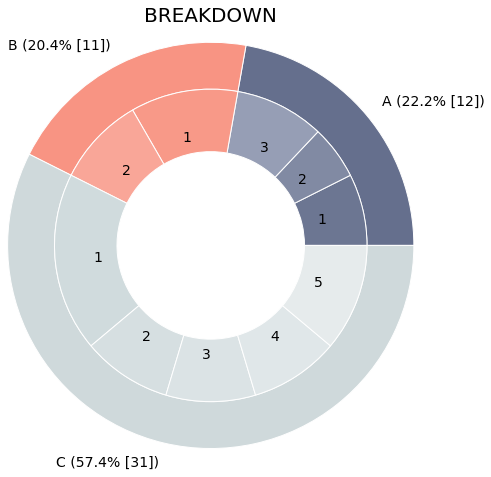

In [7]:
donut_plot_with_subgroups_from_dataframe.donut_plot_with_subgroups_from_dataframe(df=df,groups_col="group",subgroups_col="subgroup", sort_on_subgroup_name=True);

Yay! The color list is being used when `sequential_color_maps_generator` gets called by the script.

Okay, that process works. All that should remain now is to edit the colors now to what you want to be your custom colors list and run it with your own data as outlined here and in the other [demo](index.ipynb).

Questions that may remain:

**So I am using this on the command line or equivalent, what can I do?**

You have to edit the script because there is no in-memory namespace you can edit. However, this editing can be done in a way that can be documented and reproducibly done in a way that can also be easily repeated. 'Easily repeated' is important because unless you save the new version yourself and specify using it, it has to be done in every fresh session. *To Be Done: Illustrate how to use sed/awk/Python to replace the code from a notebook.*

**I am using the related scripts, either `donut_plot_with_total_summary_and_subgroups_from_dataframe.py` or `donut_plot_with_total_binary_summary_and_binary_state_subgroups.py`, what can I do?**

The same process would work.  
However, I didn't include illustrating with them for two reasons.  
The primary reason is that it would be very redundant as you basically just need to to change the script name in the code above and it will work. The other reason is that the colors for the summary plot on the left gets drawn from the same resource, and I set up the code to cycle on the one list of colos. And so if you provide less colors than you have subgroups and groups, some of the same colors are going to end up in both the right and left plots. Here is a variation on the code above you can use to more effectively control each side of the plots where there is a summary sub-plot on the left:

```python
#ALTERNATE WHEN WANT SET COLORS YOURSELF (SUCH AS TO MATCH A PALETTE FOR POSTER):
# This will go through three colors for a left, summar plot and then cycle for the 
# right plot.
color_list_to_use = ["#17254E","#F46249","#BBCACD","#30688D","#B1A091"]
def new_version():
    '''
    This will cycle over a built-in list of colors to return color maps.
    The first list being for the summary on the left. The other being for
    the sub-plot on the right.

    Edit the list of colors as hexidecimals to change them to yours.

    Returns sequential colormaps based on the next color in respective list.
    '''
    import seaborn as sns
    color_list_to_use_in_summary = ["#17254E","#F46249","#BBCACD"]
    color_list_to_use_on_right = ["#30688D","#B1A091"]
    for cl in ccolor_list_to_use_in_summary:
        yield sns.light_palette(cl, as_cmap=True)
    from itertools import cycle
    color_cycle = cycle(color_list_to_use)
    for cl in color_cycle:
        yield sns.light_palette(cl, as_cmap=True)
```

-----

Enjoy.